# Linear Regression Model

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import data
price_data = pd.read_csv("../data/merged_games_df.csv")

In [30]:
price_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False


In [43]:
# Make all the NAN values "0"
fill_zero = price_data.fillna(0)

In [51]:
# Change the floats to integers
fill_zero['NA_Sales'] = fill_zero['NA_Sales'].apply(np.int64)
fill_zero['EU_Sales'] = fill_zero['EU_Sales'].apply(np.int64)
fill_zero['JP_Sales'] = fill_zero['JP_Sales'].apply(np.int64)
fill_zero['Global_Sales'] = fill_zero['Global_Sales'].apply(np.int64)
fill_zero['Other_Sales'] = fill_zero['Other_Sales'].apply(np.int64)
fill_zero['Price'] = fill_zero['Price'].apply(np.int64)

In [52]:
fill_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1283 non-null   object
 1   Platform      1283 non-null   object
 2   Year          1283 non-null   int64 
 3   Genre         1283 non-null   object
 4   Publisher     1283 non-null   object
 5   NA_Sales      1283 non-null   int64 
 6   EU_Sales      1283 non-null   int64 
 7   JP_Sales      1283 non-null   int64 
 8   Other_Sales   1283 non-null   int64 
 9   Global_Sales  1283 non-null   int64 
 10  Console       1283 non-null   object
 11  Game Title    1283 non-null   object
 12  Price         1283 non-null   int64 
 13  Mean          1283 non-null   bool  
 14  Median        1283 non-null   bool  
dtypes: bool(2), int64(7), object(6)
memory usage: 132.9+ KB


/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

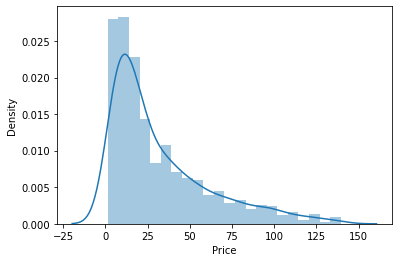

In [53]:
sns.distplot(price_data['Price'])

<AxesSubplot:>

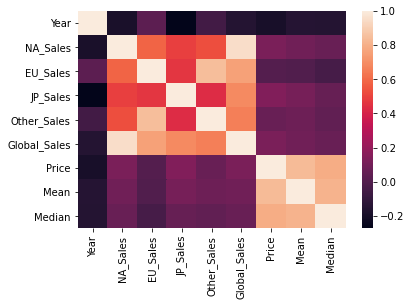

In [54]:
sns.heatmap(price_data.corr())

In [91]:
X = fill_zero[['NA_Sales', 'EU_Sales', 'JP_Sales',
               'Other_Sales', 'Global_Sales']]
y = fill_zero['Price']

## Train, Test, Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##  Creating and  Training the Model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [96]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [97]:
# print the intercept
print(lm.intercept_)

30.801979959886665


In [98]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
NA_Sales,-0.000119
EU_Sales,-0.000124
JP_Sales,-0.000092
Other_Sales,-0.000244
Global_Sales,0.000121


## Model Predictions

In [99]:
predictions = lm.predict(X_test)

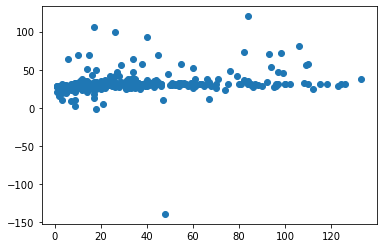

In [100]:
plt.scatter(y_test,predictions)

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


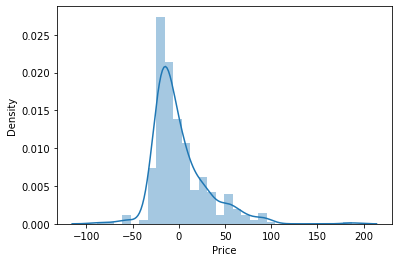

In [101]:
sns.distplot((y_test-predictions),bins=30);

## Regression Evaluation Metrics

In [102]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21.376307613348903
MSE: 860.3050171322574
RMSE: 29.33095663513649
